#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [ ]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/cse519'
/content/drive/MyDrive/CSE519


In [ ]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


In [ ]:
## Upload the file by clicking on the browse
from google.colab import files
files.upload()

## Create a new API token under "Account" in the kaggle webpage and download the json file

{}

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle competitions download -c optiver-trading-at-the-close
# !unzip optiver-trading-at-the-close.zip
!ls
%cd drive/MyDrive/CSE519/

1fmLto0GZmoVG9BOYqwPQL18riEKnPJdq	  kaggle.json	     sample_submission.csv  train.csv
commonlit-evaluate-student-summaries.zip  prompts_test.csv   summaries_test.csv
hw3					  prompts_train.csv  summaries_train.csv
[Errno 2] No such file or directory: 'drive/MyDrive/CSE519/'
/content/drive/MyDrive/CSE519


#### Q1: Anomalies and Cleaning, 15 pts


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": int,
  "date_id": int,
  "seconds_in_bucket":int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":int,
  "row_id": "string",
}

trainData = pd.read_csv('train.csv')
trainData.dtypes
trainData.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [ ]:
df = trainData
columns_with_null = df.columns[df.isnull().any()]
display(columns_with_null)
display(df.isnull().sum())

Index(['imbalance_size', 'reference_price', 'matched_size', 'far_price',
       'near_price', 'bid_price', 'ask_price', 'wap', 'target'],
      dtype='object')

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

Here, we can drop the rows with target value as null directly as we are creating a model to predict this value so imputing incorrect values here may not make sense, moreover there are only 88 rows. For other columns with missing values such as imbalance_size, reference_price, matched_size, bid_price, ask_price and wap, as the number of missing rows is 220 out of 5 millions rows, we can remove them as well as it may not have a lot of impact if we remove them


In [ ]:
df = df.dropna(subset=['target'])
df = df.dropna(subset=['ask_price'])
display(df.isnull().sum())

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                   0
imbalance_buy_sell_flag          0
reference_price                  0
matched_size                     0
far_price                  2894122
near_price                 2856960
bid_price                        0
bid_size                         0
ask_price                        0
ask_size                         0
wap                              0
target                           0
time_id                          0
row_id                           0
dtype: int64

Just by removing rows with null target and null ask_price we are able to get rid of null rows, this indicates same rows were having all the missing data. Imputing mean/median would have generated an imaginary data. Now, far_price and near_price have almost more than half the values as null, we can try to plot these values for a few (stock_id, date_id) pairs to get an idea.

<Axes: xlabel='seconds_in_bucket'>

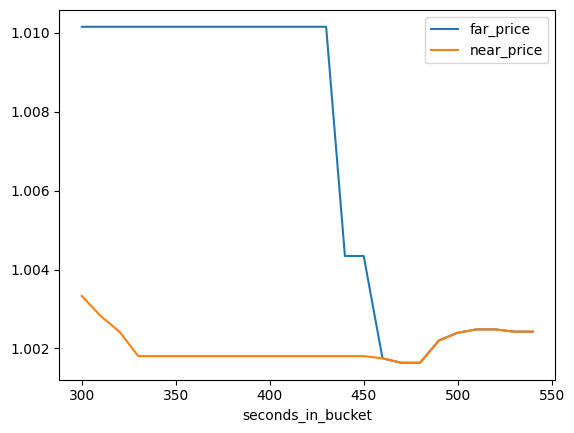

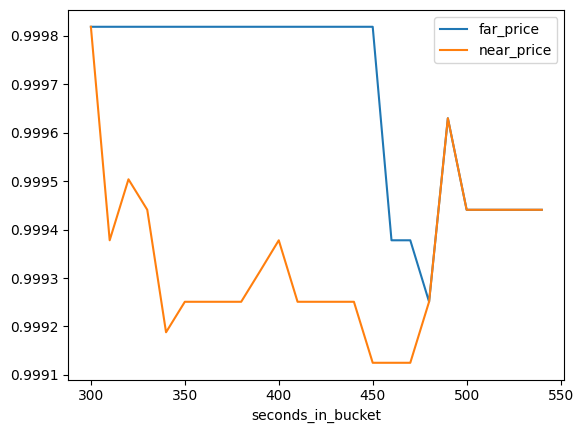

In [ ]:
df_plot = df[(df.stock_id == 2)  & (df.date_id == 40)].copy()
df_plot.plot(x="seconds_in_bucket", y=["far_price", "near_price"])
df_plot = df[(df.stock_id == 50)  & (df.date_id == 26)].copy()
df_plot.plot(x="seconds_in_bucket", y=["far_price", "near_price"])

There is no data for far_price and near_price for first 300 seconds for any stock_id, date_id pair, but we cannot drop these rows, we can consider dropping the features but they are important according to the description, hence we can impute them with mean over stock and date_id


In [ ]:
df['near_price'] = df.groupby(['stock_id', 'date_id'])['near_price'].transform(lambda x: x.fillna(x.dropna().mean()))
df['far_price'] = df.groupby(['stock_id', 'date_id'])['far_price'].transform(lambda x: x.fillna(x.dropna().mean()))

In [ ]:

# fill nulls by removing outliers before considering them for calculating mean
def fill_group(group_df, arg):
    column=arg
    Q1 = group_df[column].quantile(0.25)
    Q3 = group_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_without_outliers = group_df[(group_df[column] >= lower_bound) & (group_df[column] <= upper_bound)][column].mean()
    # group_df[column] = group_df[column].apply(lambda x: mean_without_outliers if x.na() else x)
    group_df[column] = group_df[column].fillna(mean_without_outliers)
    return group_df

columns_with_null = df.columns[df.isnull().any()]
# for column in columns_with_null:
#   df[column] = df.groupby(['stock_id', 'date_id'])[column].transform(lambda x: x.fillna(x.dropna().median()))

In [ ]:
numCols = ["imbalance_size", "reference_price", "matched_size","bid_price", "bid_size", "ask_price", "ask_size", "wap", "imbalance_buy_sell_flag"]
catCols = ["imbalance_buy_sell_flag", "stock_id"]
featureCols = numCols + catCols
output = "target"
stock_ids = list(trainData.stock_id.unique())

In [ ]:
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)
df['far_price'] = df.groupby('stock_id')['far_price'].transform(lambda x: x.fillna(x.dropna().mean()))
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)

Index(['far_price'], dtype='object')
Index([], dtype='object')


In [ ]:
print(df.groupby(['stock_id', 'date_id'])['seconds_in_bucket'].count().apply(lambda x: x == 55).all())
print(df.groupby(['stock_id', 'seconds_in_bucket'])['date_id'].count().apply(lambda x: x == 480).all())

True
False


To look for anamolies like whethere there are days with missing or missing days itself, the above check to aggregate by stock_id and date_id and then calculating the number of seconds_in_bucket which should be 55 for everyone, we conclude that there are no days with missing data but there are days missing altogether.

#### Q2: Pairwise Corralation Table and Explaition. 10 pts


Index([], dtype='object')


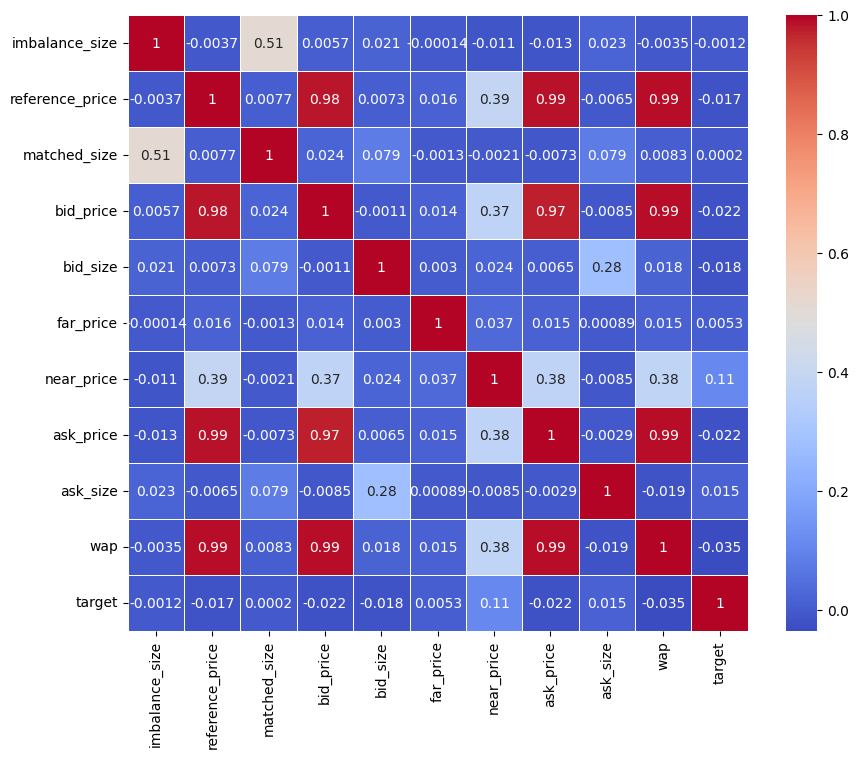

In [ ]:
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)
# print(df.head())
numCols = ["imbalance_size", "reference_price", "matched_size","bid_price", "bid_size", "far_price", "near_price", "ask_price", "ask_size", "wap", "target"]
correlation_matrix = df[numCols].corr(method='pearson')
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.show()

We can observe that the ask_price and bid_price have high correlation with 0.97 which is understandable as the the auction will be successful only if ask_price and bid price converge which explains their correlation.

WAP is highly correlated with ask_price and bid_price both with a correlation value of 0.99, this can be explained based on the definition of wap which is a weighted average of ask_price against bid_size and bid_price against ask_size.

Reference_price is well correlated with wap, ask_price with 0.99 and with bid_price with 0.98, this can explained as the reference_price is a value used to create consensus between bid and ask prices, it should be highly correlated with bid_price and ask_price, otherwise it will not be a good measure of reference.

#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



In [ ]:
# a. autocorrelation

In [ ]:
def computeAvg(df1):
  columns = ["imbalance_size", "reference_price", "matched_size", "bid_price", "bid_size", "ask_price", "ask_size", "wap", "target"]
  df1['avg'] = 0
  for i in (-10, 11):
    df1['avg'] += np.sqrt(np.sum((df1 - df1.shift(i))**2, axis=1))

  df1['avg'] = df1['avg']/21
  return df1

columns = ["imbalance_size", "reference_price", "matched_size",
          "bid_price", "bid_size", "far_price", "near_price", "ask_price", "ask_size", "wap", "target"]

df_aggre = df.groupby(['stock_id', 'date_id'], as_index=False, group_keys=False)[columns].aggregate('mean')
df_with_windowavg = df_aggre.sort_values(['stock_id', 'date_id'], ascending=True).groupby(['stock_id'], as_index=False, group_keys=False).apply(lambda x: computeAvg(x))
display(df_with_windowavg.head(15))

,stock_id,date_id,imbalance_size,reference_price,matched_size,bid_price,bid_size,far_price,near_price,ask_price,ask_size,wap,target,avg
0,0,0,1.229794e+06,0.999664,2.064913e+07,0.999547,36503.148364,0.999692,0.999615,0.999697,34108.372182,0.999618,-0.734535,4.938106e+05
1,0,1,1.175555e+06,0.999050,9.342939e+06,0.998903,39277.045455,1.009668,1.003035,0.999091,25393.018909,0.999000,0.328942,5.342113e+04
2,0,2,1.593084e+04,0.998940,1.306975e+07,0.998895,34400.522909,0.998583,0.998583,0.999039,37903.561091,0.998962,-0.326709,1.852514e+05
3,0,3,5.396968e+06,0.998883,1.414532e+07,0.998834,45016.867818,0.977043,0.938763,0.999015,75358.912364,0.998919,-3.225099,2.485119e+05
4,0,4,4.132774e+06,1.000689,1.882983e+07,1.000637,31768.836727,0.985712,0.986791,1.000925,56905.171818,1.000755,-1.614007,2.870726e+05
5,0,5,1.899766e+06,0.999248,1.317988e+07,0.999164,48941.870182,0.996814,0.997070,0.999330,88199.663273,0.999223,-2.244483,1.689113e+05
6,0,6,2.270595e+06,1.001386,1.478784e+07,1.001277,34461.083455,1.007845,1.005178,1.001403,25900.355636,1.001349,2.343698,2.157647e+05
7,0,7,2.546519e+06,0.999474,1.314888e+07,0.999450,32375.079636,0.993659,0.996847,0.999612,29456.082182,0.999539,-0.712015,1.058034e+05
8,0,8,1.593031e+05,1.000464,8.672069e+06,1.000363,40429.534000,1.000380,1.000372,1.000499,33590.903818,1.000436,-0.440543,1.109826e+04
9,0,9,1.774621e+06,0.999227,1.042893e+07,0.999110,26043.860364,0.998979,0.998979,0.999251,46357.852727,0.999171,-1.089605,5.074290e+05


Here, we are first take the aggreate to get the pairs of {stock_id, date_id} and representative values for the day eliminiating seconds_in_bucket, then we calculate the euclidean distance of each row with 10 rows above and below it on a list of features like bid_price, ask_price, wap, reference_price, etc that would make sense calculating distance, and take avg of these distance values.

In [ ]:
# Calculate autocorrelation
def calculate_autocorrelation(group):
  lag1 = group['avg'].autocorr(1)
  lag8 = group['avg'].autocorr(8)
  lag15 = group['avg'].autocorr(15)
  lag20 = group['avg'].autocorr(20)
  lag12 = group['avg'].autocorr(12)
  lag4 = group['avg'].autocorr(4)
  lag6 = group['avg'].autocorr(6)
  lag10 = group['avg'].autocorr(10)
  lag18 = group['avg'].autocorr(18)
  return pd.Series({
      'ac_lag1': lag1,
      'ac_lag4': lag4,
      'ac_lag6': lag6,
      'ac_lag8': lag8,
      'ac_lag10': lag10,
      'ac_lag12': lag12,
      'ac_lag15': lag15,
      'ac_lag18': lag18,
      'ac_lag20': lag20
      })

# Group by 'stock_id' and calculate autocorrelation for each stock_id
autocorrelation_result = df_with_windowavg.groupby('stock_id', as_index=False).apply(calculate_autocorrelation)
display(autocorrelation_result.head())


,stock_id,ac_lag1,ac_lag4,ac_lag6,ac_lag8,ac_lag10,ac_lag12,ac_lag15,ac_lag18,ac_lag20
0,0,0.153637,-0.086020,-0.093776,-0.002356,0.476998,0.057894,-0.086500,-0.025781,0.060624
1,1,0.163277,0.031257,0.070432,-0.000415,0.409263,-0.004898,0.019784,0.047549,-0.011758
2,2,0.184755,-0.012583,-0.013933,0.036795,0.506159,0.005063,-0.016557,0.005445,0.060973
3,3,0.184384,-0.074097,-0.076021,-0.023664,0.434795,0.085869,-0.087872,-0.076118,-0.026782
4,4,0.237669,-0.000864,-0.036243,0.003605,0.449766,0.134838,-0.070163,-0.083678,-0.050869


The first half calculates the autocorrelation for the avg distance column that we created in the previous cell with different lag values, this autocorrelation gives us an idea about how well they are correlated with itself at a lag i.e. in the time if the past row is affecting the future row for each stock_id.

In [ ]:
# This piece does the ljungbox test to measure autocorrelation significance
from statsmodels.stats.diagnostic import acorr_ljungbox
alpha = 0.05 # usually a standart alpha value while peforming ljungbox test

for stock_id in df_with_windowavg['stock_id'].unique():
  stock_data = df_with_windowavg[df_with_windowavg['stock_id'] == stock_id]['avg']
  lags=[1, 4, 7 ,9, 13, 16]
  # Calculate autocorrelation function (ACF) at different lags
  lb_pvalue = acorr_ljungbox(stock_data, lags=lags)

  for i in range(lb_pvalue.shape[0]):
    p = lb_pvalue.iloc[i]['lb_pvalue']
    lag = lags[i]
    if p < alpha:
      print(f"Stock {stock_id}: Significant autocorrelation at lag {lag + 1} (p < {alpha}).")



Stock 0: Significant autocorrelation at lag 2 (p < 0.05).
Stock 0: Significant autocorrelation at lag 5 (p < 0.05).
Stock 0: Significant autocorrelation at lag 8 (p < 0.05).
Stock 0: Significant autocorrelation at lag 10 (p < 0.05).
Stock 0: Significant autocorrelation at lag 14 (p < 0.05).
Stock 0: Significant autocorrelation at lag 17 (p < 0.05).
Stock 1: Significant autocorrelation at lag 2 (p < 0.05).
Stock 1: Significant autocorrelation at lag 5 (p < 0.05).
Stock 1: Significant autocorrelation at lag 8 (p < 0.05).
Stock 1: Significant autocorrelation at lag 14 (p < 0.05).
Stock 1: Significant autocorrelation at lag 17 (p < 0.05).
Stock 2: Significant autocorrelation at lag 2 (p < 0.05).
Stock 2: Significant autocorrelation at lag 5 (p < 0.05).
Stock 2: Significant autocorrelation at lag 8 (p < 0.05).
Stock 2: Significant autocorrelation at lag 10 (p < 0.05).
Stock 2: Significant autocorrelation at lag 14 (p < 0.05).
Stock 2: Significant autocorrelation at lag 17 (p < 0.05).
Stock 

To get the measure of significance of autocorrelation, there are major 3 tests, Durbin-Watson, which uses only one lag, LjungBox for different orders of lag with chi-square distribution, and Breush-Godfrey test which checks for higher order autocorrelation. I used LjungBox test to get the significance values here as we want to check against different lag values. We are using multiple lags [1, 4, 7, 9, 13, 16] and observe if the autocorrelation is significant and various lag values by printing the result.

In [ ]:
# Here, the avg_dist is very large because it is driven by imbalance_size and matched_size which is a large number resulting in the distance being large
# We should probably consider normalizing the data before performing this calculation to derive insights from this

In [ ]:
# b. measure the distance, 5 pts

In [ ]:
from scipy.spatial.distance import pdist, squareform
def compute_dist(df):
  matrix = pdist(df, 'euclidean')
  sq_matrix = squareform(matrix)
  m=df.shape[0]
  date_id = df.iloc[0]['date_id']
  i, j = np.triu_indices(m, k=1)
  # i, j = np.indices(m, m)
  # i, j = [(i, j) for i in range(m) for j in range(m)]

  ret_df = pd.DataFrame({
    'date_id': df['date_id'].values[i],
    'stock_a': df['stock_id'].values[i],
    'stock_b': df['stock_id'].values[j],
    'distance': sq_matrix[i, j]
  })

  return ret_df

ret_df = df_aggre.groupby('date_id', as_index=False).apply(compute_dist)
display(ret_df.head(15))

# sort and get the pairs of stock with smaller distance by taking mean, plot these dates
ret_df1 = ret_df.groupby(['stock_a', 'stock_b'])['distance'].mean()
ret_df_logs = np.log(ret_df1.sort_values())

display(ret_df_logs.head(10))

date_id  stock_a  stock_b      distance
0 0         0        0        1  1.814424e+07
  1         0        0        2  1.738069e+07
  2         0        0        3  1.149267e+07
  3         0        0        4  8.375231e+06
  4         0        0        5  3.193561e+06
  5         0        0        6  1.517637e+07
  6         0        0        7  2.185419e+07
  7         0        0        8  3.690985e+06
  8         0        0        9  1.091522e+07
  9         0        0       10  6.139125e+06
  10        0        0       11  1.740909e+07
  11        0        0       12  9.359042e+06
  12        0        0       13  8.820805e+06
  13        0        0       14  3.530137e+07
  14        0        0       15  1.342135e+07

stock_a  stock_b
31       143        13.868837
         111        14.603586
98       111        14.610546
31       98         14.639996
98       180        14.650842
1        98         14.652374
98       136        14.682819
136      180        14.726843
1        47         14.736949
111      136        14.739501
Name: distance, dtype: float64

Here, we calculate pairwise distance for stocks using euclidean distance function. Then taking log of the distance value to make it readable and comparable, we get the top 10 pairs with smallest mean(over days) distance values which tells us that these pairs have more correlation probably.


<Axes: xlabel='date_id'>

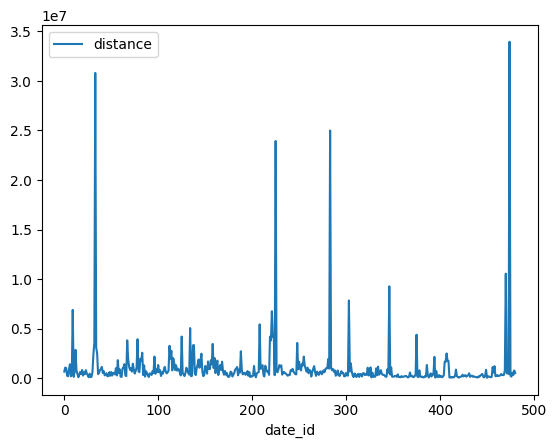

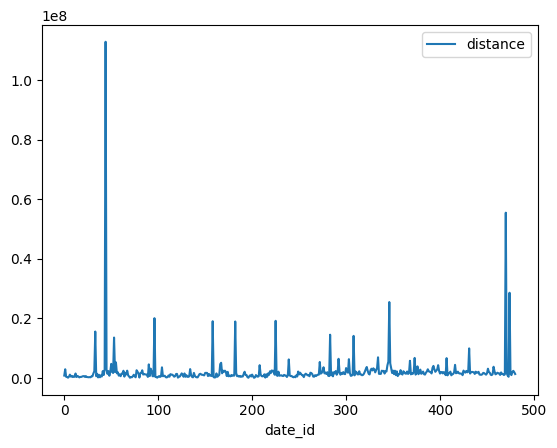

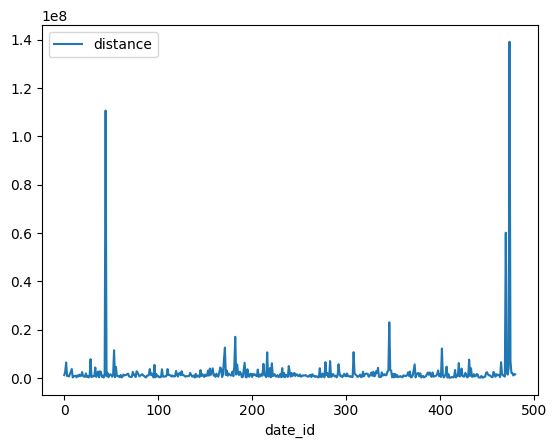

In [ ]:
df_stock_dist_cp = ret_df
df_stock_dist_cp = ret_df[(ret_df.stock_a == 31)  & (ret_df.stock_b == 143)].copy()
df_stock_dist_cp.plot(x="date_id", y=["distance"])
df_stock_dist_cp = ret_df[(ret_df.stock_a == 31)  & (ret_df.stock_b == 111)].copy()
df_stock_dist_cp.plot(x="date_id", y=["distance"])
df_stock_dist_cp = ret_df[(ret_df.stock_a == 98)  & (ret_df.stock_b == 111)].copy()
df_stock_dist_cp.plot(x="date_id", y=["distance"])

We plot the top 3 pairs to understand the distance pattern between the pairs of stocks, in the first plot for pair{31, 143} we can see that although mostly the distance is small there are some spikes which indicate there is movement in the stock prices in one of them affecting the distance at that moment.
Second and third plot also have some spikes but they are mostly close to start and end of the day which indicates fluctuations around closing, but they are mostly low throughout the day

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


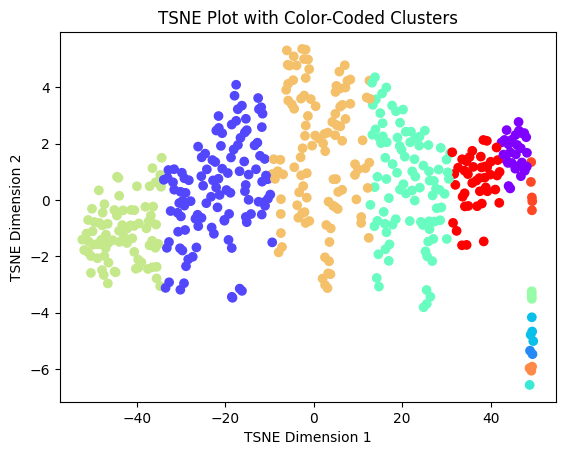

In [ ]:
from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
k = 12
df_kms = df_aggre.groupby('date_id').aggregate('mean')
X = df_kms
# X = autocorrelation_result[['autoCorr_lag1', 'autoCorr_lag2', 'autoCorr_lag3']]
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(X)
# Add the cluster labels to the original DataFrame
df_kms['Cluster'] = kmeans.labels_
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_kms['Cluster'], cmap='rainbow')
plt.title('TSNE Plot with Color-Coded Clusters')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()

Here, we use the aggregated data over date and seconds of day to get one consensus row for each stock and used k-means with 12 clusters to get the clusters, the TSNE plot shows 6 major clusters and other 6 are small cluster which indicates that the there are 6 different behaviors on stocks that our data is showing.

#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


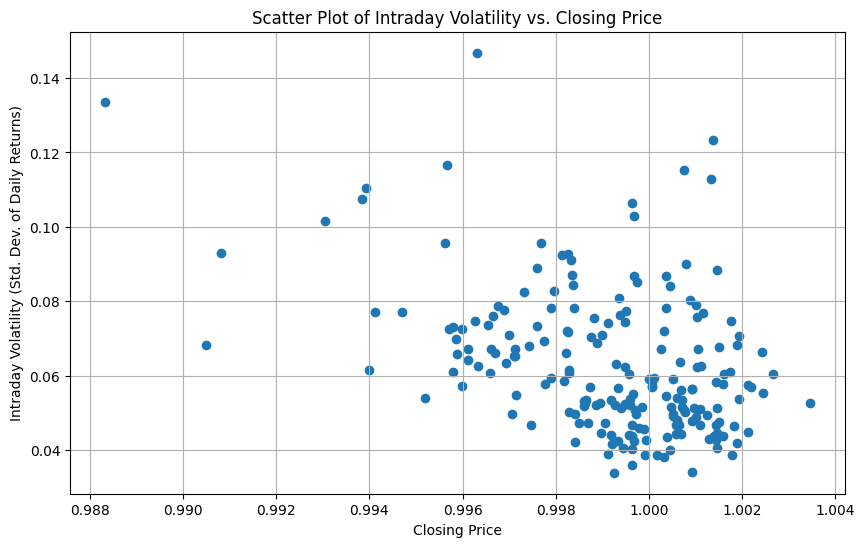

In [ ]:
# 4.a Make three plots

# df_stock_dist_cp = df[(df.stock_id == 1)  & (df.date_id == 1)].copy()
# df_stock_dist_cp.plot(x="seconds_in_bucket", y=["wap"], title='Plot for stock_id=1 and day 1')

# df_stock_dist_cp = df[(df.stock_id == 2)  & (df.date_id == 1)].copy()
# df_stock_dist_cp.plot(x="seconds_in_bucket", y=["wap"], title='Plot for stock_id=1 and day 1')

data = df.copy()
data['daily_returns'] = data.groupby('stock_id')['reference_price'].pct_change() * 100

# Filter out rows with missing daily returns
data.dropna(subset=['daily_returns'], inplace=True)

# Calculate intraday volatility (standard deviation of daily returns)
intraday_volatility = data.groupby('stock_id')['daily_returns'].std()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.groupby('stock_id')['reference_price'].last(), intraday_volatility)

plt.xlabel('Closing Price')
plt.ylabel('Intraday Volatility (Std. Dev. of Daily Returns)')
plt.title('Scatter Plot of Intraday Volatility vs. Closing Price')
plt.grid(True)

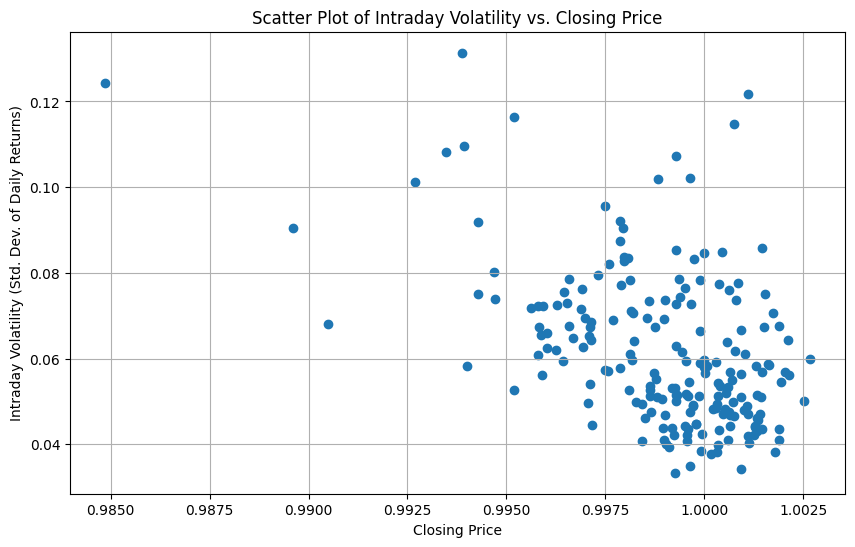

In [ ]:
data = df.copy()
data['daily_returns'] = data.groupby('stock_id')['bid_price'].pct_change() * 100

# Filter out rows with missing daily returns
data.dropna(subset=['daily_returns'], inplace=True)

# Calculate intraday volatility (standard deviation of daily returns)
intraday_volatility = data.groupby('stock_id')['daily_returns'].std()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.groupby('stock_id')['bid_price'].last(), intraday_volatility)

plt.xlabel('Closing Price')
plt.ylabel('Intraday Volatility (Std. Dev. of Daily Returns)')
plt.title('Scatter Plot of Intraday Volatility vs. Closing Price')
plt.grid(True)

Here, the closing price is very well autocorrelated with the interday volatility which tells us that the stocks are moving closer to higher closing price

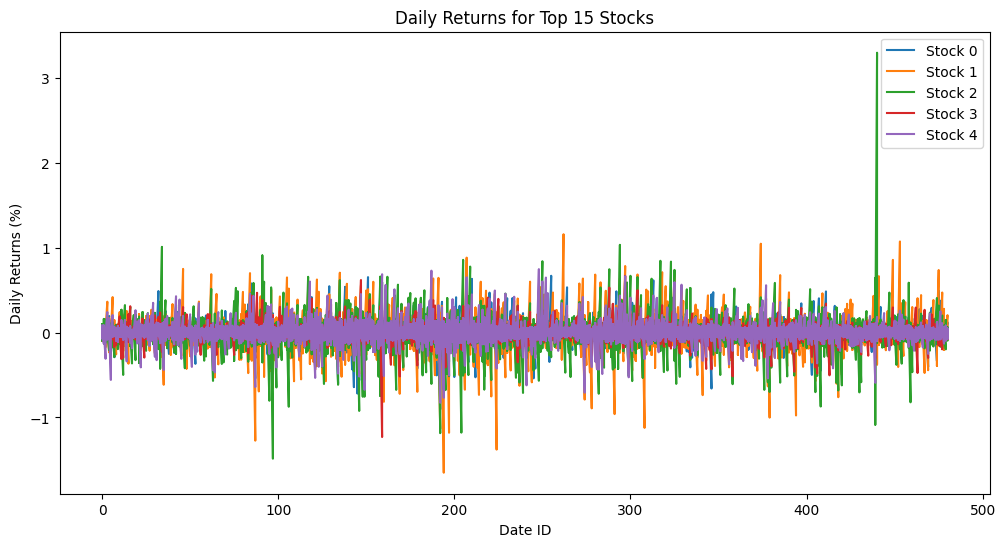

In [ ]:
import seaborn as sns
from scipy.stats import pearsonr

data = df.copy()
# Consider only the first 15 unique stock IDs
top_15_stock_ids = data['stock_id'].unique()[:5]
data = data[data['stock_id'].isin(top_15_stock_ids)].copy()

# Drop rows with missing values
data.dropna(subset=['reference_price'], inplace=True)

# Calculate daily returns for each stock
data['daily_returns'] = data.groupby('stock_id')['reference_price'].pct_change() * 100

data['ask_price_returns'] = data.groupby('stock_id')['bid_price'].pct_change() * 100

data.dropna(subset=['daily_returns'], inplace=True)
# Plot daily returns for the top 15 stock IDs
plt.figure(figsize=(12, 6))
for stock_id, stock_data in data.groupby('stock_id'):
    plt.plot(stock_data['date_id'], stock_data['daily_returns'], label=f'Stock {stock_id}')

plt.xlabel('Date ID')
plt.ylabel('Daily Returns (%)')
plt.title('Daily Returns for Top 15 Stocks')
plt.legend(loc='upper right')
plt.show()

We can observe that the daily returns of some stocks have very high variations while some don't, here stock 3 has high variations while stock2 has one outlier.

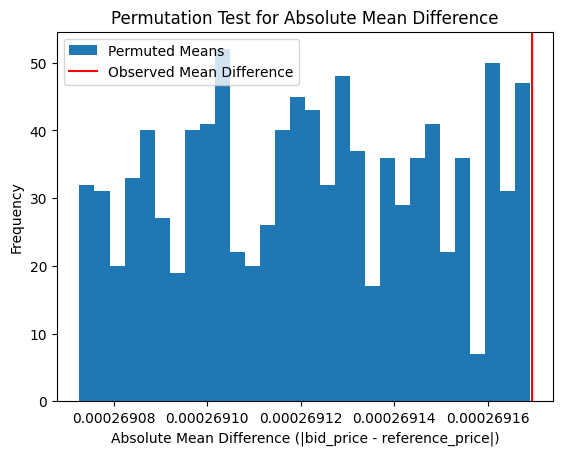

Observed Absolute Mean Difference: 0.0002691693976039078
p-value: 0.0


In [ ]:
# b. permutation test for statistical confidence, p-value
import matplotlib.pyplot as plt

original_corr = abs(df['bid_price'].mean() - df['reference_price'].mean())

permutations = 1000

permuted_means = []
for _ in range(permutations):
    permuted_df = df
    indx = np.random.randint(0, df.shape[0])
    permuted_df.at[indx, 'bid_price'], permuted_df.at[indx, 'reference_price'] = permuted_df.at[indx, 'reference_price'], permuted_df.at[indx, 'bid_price']
    permuted_mean_diff = abs(permuted_df['bid_price'].mean() - permuted_df['reference_price'].mean())
    permuted_means.append(permuted_mean_diff)

p_value = (np.abs(permuted_means) >= np.abs(original_corr)).mean()
plt.hist(permuted_means, bins=30, label='Permuted Means')
plt.axvline(original_corr, color='red', label='Observed Mean Difference')
plt.xlabel('Absolute Mean Difference (|bid_price - reference_price|)')
plt.ylabel('Frequency')
plt.title('Permutation Test for Absolute Mean Difference')
plt.legend()
plt.show()

print(f'Observed Absolute Mean Difference: {original_corr}')
print(f'p-value: {p_value}')


Here, we are creating permutations by swapping wap values with reference values to bid_price and vice versa, and calculating the mean error between them. The above histogram plots the mean difference for the permutations we created, all the permutations have the mean differece below the original mean, which implies that our mean correlation between bid_price and reference is highly significant.

#### Q5: Best prediction model, any approaches, 25 pts


In [ ]:
df['bid_size_ask_size_ratio'] = df['bid_size'].div(df['ask_size'])
df['bid_price_ask_price_ratio'] = df['bid_price'].div(df['ask_price'])
df['imbalance_matched_ratio'] = df['imbalance_size'].div(df['matched_size'])
df['wap_reference_ratio'] = (df['wap'] - df['reference_price']).div(df['wap'] + df['reference_price'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df[['stock_id', 'date_id', 'wap', 'bid_price', 'ask_price', 'imbalance_size', 'reference_price']]
y = df['target']

kf = KFold(n_splits=5, shuffle=True, random_state=0)
gb_model = RandomForestRegressor(max_depth=2, random_state=0)
mae_scores = -cross_val_score(gb_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
for i, mae in enumerate(mae_scores, 1):
  print(f'Fold {i} MAE: {mae:.2f}')

Fold 1 MAE: 6.40
Fold 2 MAE: 6.41
Fold 3 MAE: 6.41
Fold 4 MAE: 6.40
Fold 5 MAE: 6.41


We are using a non-linear model RandomForestRegressor to train and generate the predictions with kfold cross validation with 5 folds.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

X = df[['stock_id', 'date_id', 'wap_reference_ratio', 'bid_size_ask_size_ratio', 'bid_price_ask_price_ratio', 'imbalance_matched_ratio']]
y = df['target']

kf = KFold(n_splits=5, shuffle=True, random_state=0)
gb_model = RandomForestRegressor(max_depth=2, random_state=0, n_jobs=-2)
mae_scores = -cross_val_score(gb_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
for i, mae in enumerate(mae_scores, 1):
  print(f'Fold {i} MAE: {mae:.2f}')


Fold 1 MAE: 6.35
Fold 2 MAE: 6.36
Fold 3 MAE: 6.36
Fold 4 MAE: 6.36
Fold 5 MAE: 6.37


In the question 2 we plotted the heatmap of correlation, our target value there doesn't correlate with any of the features, which means there is no linear relation with any features so we cannot use models like linear regression, we should use non-linear models such as RandomForest regressor, Gradient boosting machine or decision trees.
Our features like bid_price, ask_price and wap are very closely correlated, we should not use them raw, hence generated a combination of them which should serve as a good feature, same with imbalance_size and matches_size, taking avergae of them as new features.


Here, we first took raw data which didn't give us good results, hence, decided to create new features as combinations of existing features as discussed above.

In [ ]:
import optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

counter = 0
gb_model.predict()
for (test, revealed_targets, sample_prediction) in iter_test:
    if counter == 0:
        print(test.head(3))
        print(revealed_targets.head(3))
        print(sample_prediction.head(3))
    test['bid_size_ask_size_ratio'] = test['bid_size'].div(test['ask_size'])
    test['bid_price_ask_price_ratio'] = test['bid_price'].div(test['ask_price'])
    test['imbalance_matched_ratio'] = test['imbalance_size'].div(test['matched_size'])
    test['wap_reference_ratio'] = (test['wap'] - test['reference_price']).div(test['wap'] + test['reference_price'])

    df_test = test[['stock_id', 'date_id', 'wap_reference_ratio', 'bid_size_over_ask_size', 'bid_price_over_ask_price', 'imbalance_matched_ratio']]
    sample_prediction['target'] = gb_model.predict(df_test)
    env.predict(sample_prediction)
    counter += 1


#### Q6: submit model on Kaggle, 0 pts
Public Score: 5.3636\
Private Score: Not Available (The Private Leaderboard isn't available yet.
The final ranks and medals will display here after the competition closes.)\
Kaggle profile link: https://www.kaggle.com/apekshabodade \
Screenshot(s): 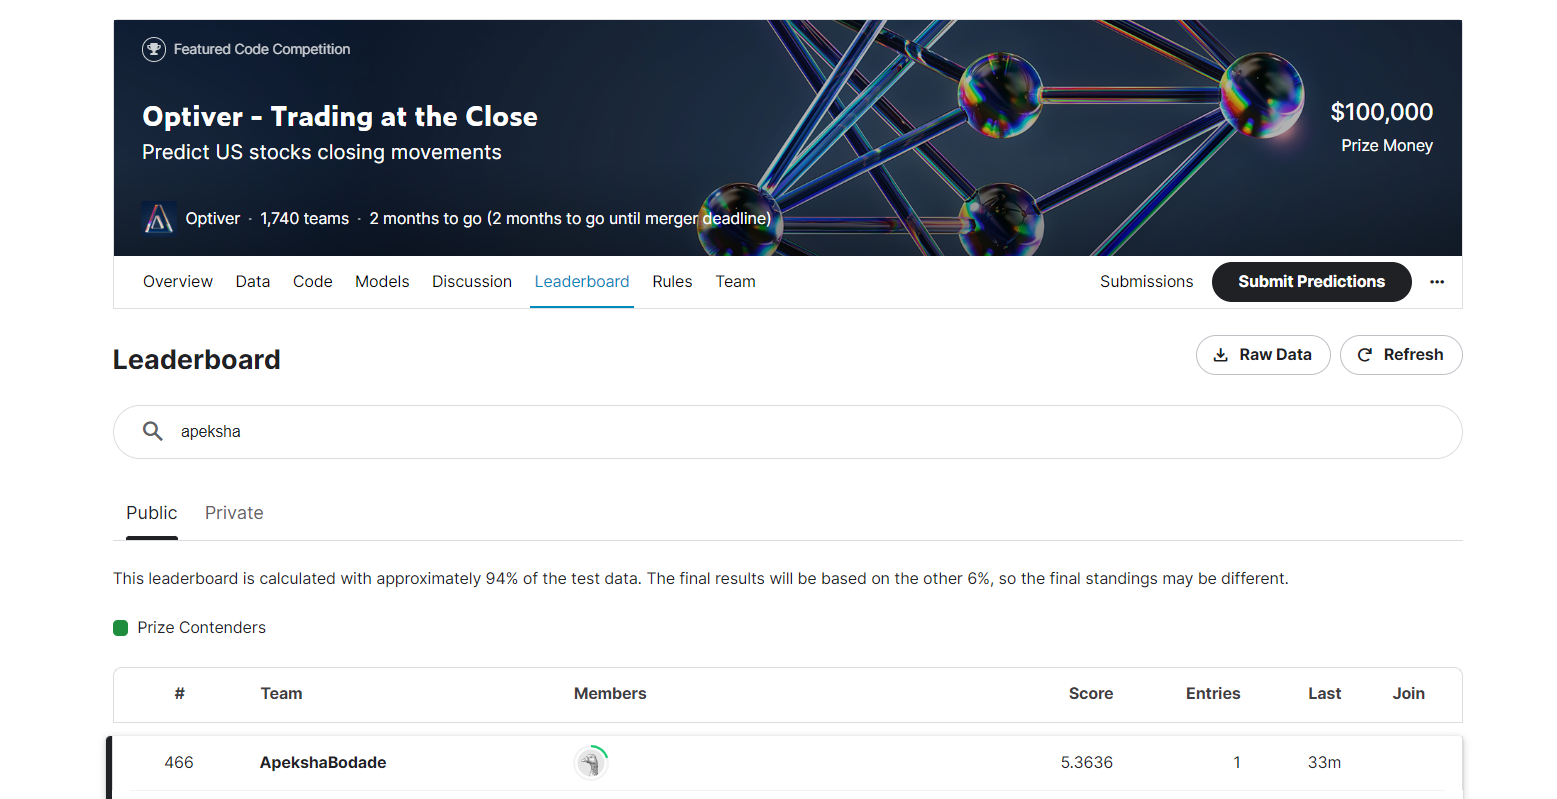